<a href="https://colab.research.google.com/github/ababkoko/Tensorflow_prac/blob/master/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.6.0


In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [15]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.show()

In [11]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [ ]:
print(train_images.shape)
plt.imshow(train_images[0], cmap=plt.cm.binary)

In [23]:
# 층 (layer) 설정
model = tf.keras.Sequential([
                             # 이미지 포맷을 1차월 배열로 변환
                             tf.keras.layers.Flatten(input_shape=(28, 28)),
                             # 활성화 함수 - 딥러닝 네트워크에서 노드에 입력된 값들을 비선형 함수에 통과시킨 후 다음 레이어로 전달
                             tf.keras.layers.Dense(128, activation='relu'),
                             # 마지막 츠은 10개의 노드의 Softmax 층으로, 10개의 확률을 반환하고 반환된 값의 전체 합은 1. 
                             tf.keras.layers.Dense(10)
])

In [26]:
# 모델 compile
model.compile(optimizer='adam',                                                       # 모델이 인식하는 데이터와 손실함수를 기반으로 모델이 업데이트 되는 방식
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),   # 모델이 얼마나 정확한지 측정
              metrics=['accuracy'])

In [27]:
# 모델 fit
odel.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4992 - accuracy: 0.8251
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3718 - accuracy: 0.8658
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3350 - accuracy: 0.8778
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3104 - accuracy: 0.8861
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2946 - accuracy: 0.8921
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2790 - accuracy: 0.8978
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2685 - accuracy: 0.9000
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2571 - accuracy: 0.9043
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2469 - accuracy: 0.9075
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.238

In [28]:
# 정확도 평가
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

313/313 - 0s - loss: 0.3378 - accuracy: 0.8810


[2.72508288e-07 1.42325565e-08 9.27899890e-09 9.05147424e-09
 1.64316546e-10 9.89046297e-04 2.15023988e-07 1.93406731e-01
 3.10249931e-07 8.05603385e-01]


<BarContainer object of 10 artists>

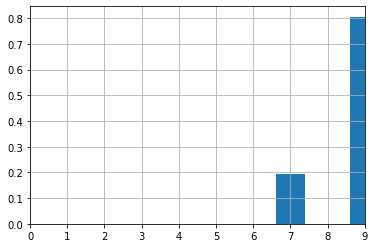

In [84]:
# 예측하기
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)
print(predictions[0])
plt.grid(True)
plt.xlim(0, 9)
plt.bar(range(10), predictions[0])

In [50]:
print(np.argmax(predictions[0]), np.max(predictions[0]))
print(test_labels[0])

9 0.8056034
9


In [66]:
# 10개 클래스에 대한 예측을 표현
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

In [ ]:
num_rows = 5
num_cols = 5

fig = plt.figure(figsize=(10, 10))

for i in range(0, 25):
  plt.subplot(num_rows, num_cols, i+1)
  plot_image(i, predictions[i], test_labels, test_images)

fig.tight_layout()
plt.show()

(28, 28)
(1, 28, 28)
[[5.5771121e-05 2.9407137e-15 9.9947077e-01 1.3263721e-10 3.1122094e-04
  1.7311966e-13 1.6226970e-04 1.8175024e-21 7.3335338e-11 1.8793268e-15]]


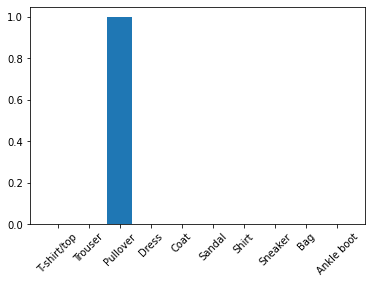

In [87]:
# 훈련된 모델 사용하여 한 이미지에 대한 예측 생성
img = test_images[1]
print(img.shape)
img = np.expand_dims(img, 0)
print(img.shape)

prediction_single = probability_model.predict(img)
print(prediction_single)

plt.bar(range(10), prediction_single[0])
plt.xticks(range(10), class_names, rotation=45)
plt.show()